In [1]:
import yfinance as yf
import plotly.graph_objects as go
import numpy as np

spy = yf.download('cvx', start='1990-01-01', progress=False)['Adj Close']
spy = spy.pct_change().dropna()
spy.index = spy.index.astype(str)
spy = spy.reset_index()
spy.columns = ['date', 'ret']

trace = go.Scatter(
    x=spy.date,
    y=spy.ret,
        hovertemplate="%{x}<br>%{y:.1%}<extra></extra>",
    name="",
    )
    
fig = go.Figure(trace)

fig.update_layout(
    template="plotly_dark",
    xaxis_title="",
    yaxis_title="",
    yaxis_tickformat=".0%",
)

fig.show()

In [2]:
trace = go.Box(
    x=spy.ret,
    text=spy.date,
    hovertemplate="%{text}<extra></extra>",
    name="",
    )
fig = go.Figure(trace)
fig.update_layout(
    template="plotly_dark",
    xaxis_title="Daily Return",
    yaxis_title="",
    xaxis_tickformat=".0%",
    yaxis_tickformat="",
)

fig.show()

In [3]:
from scipy.stats import norm
from scipy.stats import gaussian_kde as kde
density = kde(spy.ret)

grid = np.linspace(np.min(spy.ret), np.max(spy.ret), 100)
trace1 = go.Scatter(
  x=grid,
  y=density(grid),
  mode="lines",
  name="actual"
)
trace2 = go.Scatter(
  x=grid, 
  y=norm.pdf(grid, loc=np.mean(spy.ret), scale=np.std(spy.ret)), 
  mode="lines", 
  name="normal"
)
fig = go.Figure()
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.update_layout(
    template="plotly_dark",
    xaxis_title="Daily Return",
    yaxis_title="",
    xaxis_tickformat=".0%",
    yaxis_tickformat="",
    legend=dict(
        yanchor="top", 
        y=0.99, 
        xanchor="right", 
        x=0.99
    ),
)

fig.show()

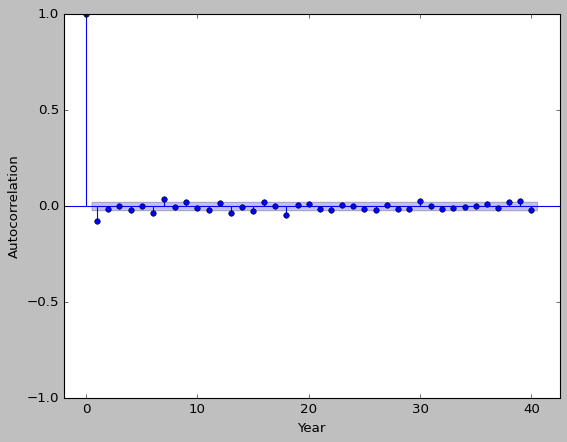

In [4]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
plt.style.use('classic')
fig = plot_acf(spy.ret)
plt.xlabel("Year")
plt.ylabel("Autocorrelation")
_ = plt.title("")

In [5]:
import statsmodels.formula.api as smf

spy['lag'] = spy.ret.shift()
spy = spy.dropna()
trace = go.Scatter(
  x=spy.lag,
  y=spy.ret,
  text=spy.date,
  mode="markers",
  hovertemplate="%{text}<extra></extra>",
  showlegend=False,
)
fig = go.Figure(trace)

result = smf.ols("ret ~ lag", data=spy).fit()
predict = result.params['Intercept'] + result.params['lag']*spy.lag
trace = go.Scatter(
  x=spy.lag,
  y=predict,
  mode="lines",
  name="regression line"
)
fig.add_trace(trace)

fig.update_layout(
    template="plotly_dark",
    xaxis_title="Lagged Return",
    yaxis_title="Return",
    xaxis_tickformat=".0%",
    yaxis_tickformat=".0%",
)

fig.show()

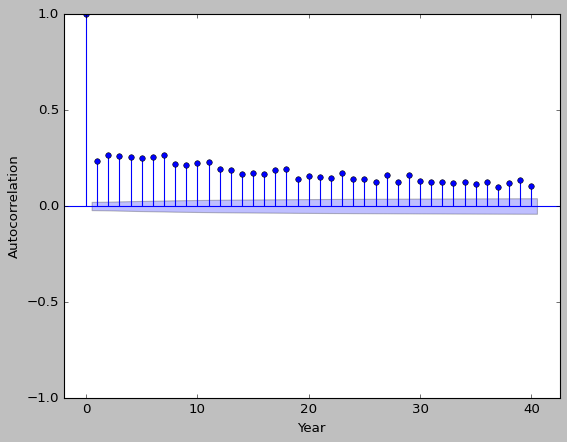

In [6]:
fig = plot_acf(spy.ret.abs())
plt.xlabel("Year")
plt.ylabel("Autocorrelation")
_ = plt.title("")

In [7]:
spy['absret'] = spy.ret.abs()
spy['abslag'] = spy.lag.abs()
trace = go.Scatter(
  x=spy.abslag,
  y=spy.absret,
  text=spy.date,
  mode="markers",
  hovertemplate="%{text}<extra></extra>",
  showlegend=False,
)
fig = go.Figure(trace)
result = smf.ols("absret ~ abslag", data=spy).fit()
spy['predict'] = result.params['Intercept'] + result.params['abslag']*spy.abslag
spy = spy.sort_values(by="abslag")
trace = go.Scatter(
  x=spy.abslag,
  y=spy.predict,
  mode="lines",
  name="regression line",
)
fig.add_trace(trace)
fig.update_layout(
    template="plotly_dark",
    xaxis_title="Lagged Absolute Return",
    yaxis_title="Absolute Return",
    xaxis_tickformat=".0%",
    yaxis_tickformat=".0%",
    xaxis_rangemode="tozero",
    yaxis_rangemode="tozero",
)

fig.show()